# Additional - Beam

![](https://raw.githubusercontent.com/ibcmrocha/public/main/beam.png)

With:
- $l_1 = 5.5$
- $l_2 = 5.0$
- $EI_1 = 5000$
- $EI_2 = 8000$
- $q = 6$
- $F = 40$
- $T = 50$

Solve this problem.

In [1]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [2]:
mm.Node.clear()
mm.Element.clear()

l1 = 5.5
l2 = 5.0
EI_1 = 5000
EI_2 = 8000
q = 6
F = 40
T = -50

nodes = []

nodes.append(mm.Node(0,0))
nodes.append(mm.Node(l1,0))
nodes.append(mm.Node(l1+l2,0))

elems = []

elems.append(mm.Element(nodes[0], nodes[1]))
elems.append(mm.Element(nodes[1], nodes[2]))

section = {}
section['EI'] = EI_1
elems[0].set_section (section)
section['EI'] = EI_2
elems[1].set_section (section)

elems[0].add_distributed_load([0,q])

con = mm.Constrainer()

con.fix_dof (nodes[0], 1)
con.fix_node (nodes[2])

nodes[1].add_load ([0,F,T])

print(con)
for elem in elems:
    print(elem)

global_k = np.zeros ((3*len(nodes), 3*len(nodes)))
global_f = np.zeros (3*len(nodes))

for e in elems:
    elmat = e.stiffness()
    idofs = e.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for n in nodes:
    global_f[n.dofs] += n.p

Kff, Ff = con.constrain ( global_k, global_f )
u = np.matmul ( np.linalg.inv(Kff), Ff )
print(u)

print(con.support_reactions(global_k,u,global_f))

This constrainer has constrained the degrees of freedom: [1, 6, 7, 8] with corresponding constrained values: [0, 0, 0, 0])
Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[  0.     16.5   -15.125]
with node #2:
 This node has:
 - x coordinate=5.5,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[  0.     56.5   -34.875]
Element connecting:
node #1:
 This node has:
 - x coordinate=5.5,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[  0.     56.5   -34.875]
with node #2:
 This node has:
 - x coordinate=10.5,
 - z coordinate=0,
 - degrees of freedom=[6, 7, 8],
 - load vector=[0. 0. 0.]
[ 0.         -0.03374903  0.          0.08862872  0.01083637]
[ -25.7389757    0.         -47.2610243 -135.4907551]


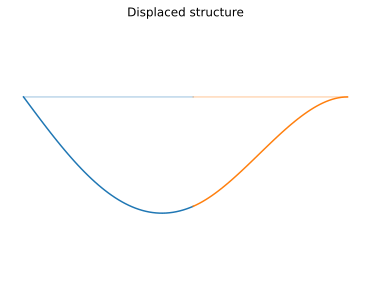

In [3]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=40)

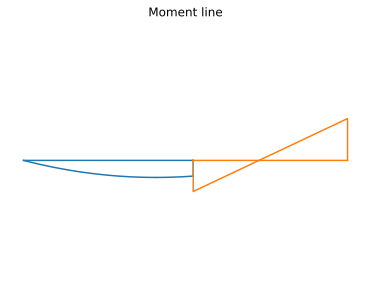

In [4]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=51,global_c=True,scale=0.01)